In [3]:
import time
import requests
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction import text 
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import pandas as pd
import random
import json

In [4]:
# headers prevent getting blocked
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
# get cat stevens songs and parse with Beautiful Soup
r_cat = requests.get("https://www.lyrics.com/artist/Cat-Stevens/5528", headers = headers)
soup_cat = BeautifulSoup(r_cat.content, "html.parser")

# list urls to cat stevens songs
cat_song_urls = []
for td in soup_cat.findAll("td", class_="tal qx"): 
    for a in td.findAll("a", href=True):
        yes_cat = a.get('href')
        #eliminates 'suggested' artists on the page != cat stevens
        if yes_cat.startswith('artist') == False:
            cat_song_urls.append(yes_cat)
            
# creates a list where each item is a different cat stevens song
song_cat_df = []
for url in cat_song_urls:
    url_cat = f"https://www.lyrics.com{song}"
    page_cat = requests.get(url_cat, headers=headers)
    soupier_cat = BeautifulSoup(page_cat.content, "html.parser")
    song_cat_df.append(soupier_cat)
    
# cleans the list to get at lyrics among HTML coding
lyrics_cat = []
for song in song_cat_df:
    for pre in item.findAll("pre", class_="lyric-body"): 
        print(pre.text)
        lyrics_cat.append(pre.text)

In [1582]:
# Add additional stop words to the CountVectorizer built-in library
additional_stop_words = ['ll','we','i','ve','don','won','t']
stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

In [1583]:
vectorizer = CountVectorizer(stop_words = stop_words, ngram_range=(1,2))

In [1584]:
#vectorize the cat lyrics
X_cat = vectorizer.fit_transform(list_cat)
X_cat

<184x9471 sparse matrix of type '<class 'numpy.int64'>'
	with 17532 stored elements in Compressed Sparse Row format>

In [1585]:
# all the words and n_grams = 2 for cat songs
words_cat = vectorizer.get_feature_names()
len(words_cat)

9471

In [1830]:
words_cat = pd.DataFrame(words_cat)

In [1827]:
# pipeline of CountVectorizer and TfidfTransformer
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range=(1,2),min_df = 0.02,max_df = 0.1)),
    ('tfidf', TfidfTransformer()),
])

In [1828]:
bag_of_words_cat = pipeline.fit_transform(list_cat)
bag_of_words_cat

<184x514 sparse matrix of type '<class 'numpy.float64'>'
	with 3623 stored elements in Compressed Sparse Row format>

In [1829]:
print(bag_of_words_cat[0])

  (0, 274)	0.4288303691838199
  (0, 506)	0.24364451241994775
  (0, 4)	0.4141806143838121
  (0, 147)	0.21441518459190995
  (0, 94)	0.3409922839048064
  (0, 268)	0.5316519540417952
  (0, 242)	0.11615300578077938
  (0, 223)	0.10186394473188945
  (0, 410)	0.13770627145043016
  (0, 457)	0.11615300578077938
  (0, 113)	0.111359722840798
  (0, 139)	0.10720759229595497
  (0, 437)	0.14337552187962463
  (0, 263)	0.14337552187962463
  (0, 245)	0.13770627145043016


In [1831]:
#summing words between all songs
all_songs_cat = sum(bag_of_words_cat[0:184])

In [1832]:
print(all_songs_cat)

  (0, 408)	1.273945477029137
  (0, 306)	0.4551817172892282
  (0, 179)	2.0770479343094723
  (0, 112)	0.45150487242861825
  (0, 32)	0.9851395143009459
  (0, 90)	1.0829912576627705
  (0, 439)	0.6483726759674199
  (0, 207)	0.7765126880547111
  (0, 221)	0.6714129187156601
  (0, 484)	1.372091344797646
  (0, 79)	0.8982634018242186
  (0, 458)	0.6809797402665771
  (0, 111)	1.2193304450708577
  (0, 474)	0.49409594024727604
  (0, 416)	1.0793597146960319
  (0, 38)	0.9311984324307795
  (0, 109)	0.9595070191878994
  (0, 390)	1.1359240691787436
  (0, 54)	0.3703350838300022
  (0, 448)	0.8207524593597821
  (0, 328)	0.4298440569757952
  (0, 495)	0.8603365858564377
  (0, 197)	0.784340726703675
  (0, 469)	1.1652704329848935
  (0, 169)	1.181474486087125
  :	:
  (0, 20)	0.8140089831895212
  (0, 424)	0.6511609415025105
  (0, 211)	1.5548426091239826
  (0, 273)	1.0612838872803587
  (0, 142)	0.37174625572443426
  (0, 296)	1.0513654833438364
  (0, 157)	0.8588202011668118
  (0, 243)	0.27057226745470564
  (0, 391)

In [1837]:
# tfidf freq output into array
array_cat = []
for i in range(0,514):
    array_cat.append(all_songs_cat[0,i])
    
cat_words_count = pd.DataFrame(array_cat)

In [1838]:
# add tfidf data to word list
words_cat['count'] = cat_words_count

In [1839]:
words_cat.rename(columns={0:'word_cat'},inplace=True)

In [1840]:
words_cat.sort_values('count',ascending=False)

,word_cat,count
507,better chance,5.064499
224,avenue stung,4.534928
288,baby crying,4.140062
15,abused dreams,3.960267
75,ahh wish,3.813786
264,away walls,3.793357
230,awake white,3.689409
226,awaiting ears,3.415141
492,beneath waves,3.404937
501,best jeans,3.363056


# Ella

In [1841]:
# import ella song list
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
r = requests.get("https://www.lyrics.com/artist/Ella-Fitzgerald/6503", headers = headers)
soup = BeautifulSoup(r.content, "html.parser")

In [1842]:
# create list of all Ella song URLs
song_list = []
for td in soup.findAll("td", class_="tal qx"): 
    for a in td.findAll("a", href=True):
        yes = a.get('href')
        # exclude 'suggested' artists
        if yes.startswith('artist') == False:
            song_list.append(yes)

In [1843]:
song_list

['/lyric/6526349/Ella+Fitzgerald/Swinging+on+the+Reservation',
 '/lyric/6710856/Ella+Fitzgerald/I%27m+Gonna+Wash+That+Man+Right+Out+of+My+Hair',
 '/lyric/1149082/Ella+Fitzgerald/Moonray',
 '/lyric/19133635/Ella+Fitzgerald/Its+Only+a+Paper+Moon',
 '/lyric/7029695/Ella+Fitzgerald/Baby+It%27s+Cold+Outside',
 '/lyric/763755/Ella+Fitzgerald/All+My+Life',
 '/lyric/763758/Ella+Fitzgerald/Darktown+Strutters%27+Ball',
 '/lyric/763762/Ella+Fitzgerald/Everyone%27s+Wrong+But+Me',
 '/lyric/763763/Ella+Fitzgerald/Heart+of+Mine',
 '/lyric/763753/Ella+Fitzgerald/Love+and+Kisses',
 '/lyric/763754/Ella+Fitzgerald/Rhythm+and+Romance',
 '/lyric/763764/Ella+Fitzgerald/Take+Another+Guess',
 '/lyric/763752/Ella+Fitzgerald/When+I+Get+Low+I+Get+High',
 '/lyric/763761/Ella+Fitzgerald/You+Showed+Me+the+Way',
 '/lyric/763773/Ella+Fitzgerald/Baby%2C+Won%27t+You+Please+Come+Home',
 '/lyric/763777/Ella+Fitzgerald/Hello+Ma%21+I+Done+It+Again',
 '/lyric/763775/Ella+Fitzgerald/My+Wubba+Dolly+%28Rubber+Dolly%29',
 '/lyr

In [1844]:
# only take 100 Ella songs
song_list = song_list[0:100]

In [1845]:
# create list of songs with HTML formatting
lyrics_df = []
for song in song_list:
    url2 = f"https://www.lyrics.com{song}"
    page = requests.get(url2, headers=headers)
    soupier = BeautifulSoup(page.content, "html.parser")
    lyrics_df.append(soupier)

In [1846]:
# collect just text
list_ella = []
for item in lyrics_df:
    for pre in item.findAll("pre", class_="lyric-body"): 
        print(pre.text)
        list_ella.append(pre.text)

It is only a paper moon
Hanging over a cardboard sea
But it wouldn't be make believe
If you believe in me

It is only a canvas sky
Sailing over a muslin tree
But it wouldn't be make believe 
If you believe in me

Without your love
It's a honky tonk parade
Without your love
It's a melody played 
On a penny arcade

It's a Barnum and Bailey world
Just as phony as it can be
But it wouldn't be make believe
If you believe in me

Without your love
It's a honky tonk parade
Without your love
It's a melody played
On a penny arcade

It's a Barnum and Bailey world
Just as phony as it can be
But it wouldn't be make believe
If you believe in me
I'm gonna wash that man right outa my hair,
I'm gonna wash that man right outa my hair,
I'm gonna wash that man right outa my hair,
And send him on his way.

I'm gonna wave that man right outa my arms,

I'm gonna wave that man right outa my arms,
I'm gonna wave that man right outa my arms,
And send him on his way.

Don't try to patch it up

Tear it up, tear i

Don't fence me in
I've got you under my skin
I've got you deep in the heart of me
So deep in my heart that you're really a part of me
I've got you under my skin

I'd tried so not to give in
I said to myself this affair never will go so well
But why should I try to resist when, darling, I know so well
I've got you under my skin

I'd sacrifice anything, come what might
For the sake of having you near
In spite of a warning voice that comes in the night
And repeats and repeats in my ear
Don't you know little fool
You never can win
Use your mentality, wake up to reality
But each time that I do just the thought of you makes me stop
Before I begin
'Cause I've got you under my skin

I would sacrifice anything come what might
For the sake of having you near
In spite of the warning voice that comes in the night
And repeats how it yells in my ear
Don't you know, little fool
You never can win
Use your mentality, wke up to reality
But each time I do just the thought of you makes me stop
Before I be

And feeling like someone in love
Like a ship at sea, I'm just lost in a fog
My mind is hazy, my thoughts are blue
Guess I'll always be kinda
Lost in a fog without you

[Chorus]
Waitin' night and day like a bump on a log
I'm goin' crazy; what can I do?
Help me find my way
'Cause I'm lost in a fog without you

It was sunny every day
The sky was fair above
But you took the light away
The day you took your love

Only fools like me could be tossed in a bog
I've got a heartache I never knew
Guess I'll always be kinda
Lost in a fog without you

Like a ship at sea, I'm lost in a fog
My mind is hazy, my thoughts are blue
Guess I'll always be kinda
Lost in a fog without you

[Chorus]

It was sunny every day
The sky was fair above
But you took the light away
The day you took your love

Only fools like me could be tossed in a bog
I've got a heartache I never knew
Guess I'll always be kinda
Lost in a fog without you
Whether you are here or yonder, 
Whether you are false or true
Whether you remain o

In [1847]:
vectorizer = CountVectorizer(stop_words = stop_words, ngram_range=(1,2))

In [1848]:
# vectorize ella
X_ella = vectorizer.fit_transform(list_ella)
X_ella

<100x6132 sparse matrix of type '<class 'numpy.int64'>'
	with 8956 stored elements in Compressed Sparse Row format>

In [1849]:
# create a list of words used in Ella songs
words_ella = vectorizer.get_feature_names()
len(words_ella)

6132

In [1850]:
bag_of_words_ella = pipeline.fit_transform(list_ella)
print(bag_of_words_ella)

  (0, 769)	0.07077693728910173
  (0, 449)	0.07077693728910173
  (0, 135)	0.07077693728910173
  (0, 890)	0.059914821678509256
  (0, 1216)	0.2142435654712591
  (0, 57)	0.5021754544339154
  (0, 129)	0.07077693728910173
  (0, 934)	0.05749916948703317
  (0, 874)	0.07077693728910173
  (0, 715)	0.07077693728910173
  (0, 1124)	0.06277193180423943
  (0, 494)	0.14155387457820345
  (0, 1098)	0.14155387457820345
  (0, 771)	0.14155387457820345
  (0, 673)	0.11081327275722253
  (0, 805)	0.13253750397840747
  (0, 787)	0.14155387457820345
  (0, 13)	0.14155387457820345
  (0, 44)	0.14155387457820345
  (0, 35)	0.14155387457820345
  (0, 793)	0.14155387457820345
  (0, 770)	0.07077693728910173
  (0, 136)	0.07077693728910173
  (0, 891)	0.07077693728910173
  (0, 1217)	0.2831077491564069
  :	:
  (97, 1014)	0.3504737579513438
  (97, 498)	0.1752368789756719
  (98, 694)	0.21108948527497182
  (98, 571)	0.21108948527497182
  (98, 381)	0.17869364446779606
  (98, 562)	0.6917539878176413
  (98, 613)	0.17148905498945816

In [1851]:
words_ella = pd.DataFrame(words_ella)

In [1853]:
# sum words across all songs
all_songs_ella = sum(bag_of_words_ella[0:99])

In [1854]:
print(all_songs_ella)

  (0, 648)	0.15710787853760536
  (0, 618)	0.518618054217922
  (0, 462)	0.7844849213702478
  (0, 429)	0.27208624845011964
  (0, 778)	0.27208624845011964
  (0, 579)	0.27208624845011964
  (0, 1178)	0.27208624845011964
  (0, 239)	0.27208624845011964
  (0, 32)	0.27208624845011964
  (0, 652)	0.27208624845011964
  (0, 83)	0.27208624845011964
  (0, 566)	0.27208624845011964
  (0, 1029)	0.27208624845011964
  (0, 1062)	0.27208624845011964
  (0, 570)	0.27208624845011964
  (0, 872)	0.27208624845011964
  (0, 544)	0.27208624845011964
  (0, 603)	0.27208624845011964
  (0, 542)	0.27208624845011964
  (0, 1087)	0.5441724969002393
  (0, 171)	0.27208624845011964
  (0, 471)	0.27208624845011964
  (0, 1075)	0.27208624845011964
  (0, 1132)	0.27208624845011964
  (0, 361)	0.27208624845011964
  :	:
  (0, 645)	0.6648293246840778
  (0, 526)	0.2216097748946926
  (0, 1159)	0.2216097748946926
  (0, 967)	0.2216097748946926
  (0, 315)	0.2216097748946926
  (0, 577)	0.2216097748946926
  (0, 700)	0.2216097748946926
  (0, 23

In [1859]:
# extract array from csr matrix formatting
array = []
for i in range(0,1269):
    array.append(all_songs_ella[0,i])

array

[0.5212088923607423,
 0.42091731457895176,
 0.35299283181671226,
 0.488869349005534,
 0.4537695504394841,
 0.2768510749985651,
 1.3620537105167896,
 1.0476303225948573,
 0.7083767649727271,
 0.24708057788312165,
 0.2650286182179914,
 1.0339697304288977,
 0.4513580386414101,
 0.2564760888740864,
 0.2564760888740864,
 0.3040891217548468,
 1.0798232688095977,
 0.7161080112839215,
 0.37606500753588423,
 0.14953663167955333,
 0.19257175945857424,
 0.19257175945857424,
 0.827504095176252,
 0.827504095176252,
 0.28593619452413177,
 0.21524210115927603,
 0.07718137906070169,
 0.192821847724409,
 0.8937569838746741,
 1.1182750596209348,
 0.14953663167955333,
 0.6783663363902682,
 0.27208624845011964,
 0.07718137906070169,
 0.07718137906070169,
 0.2564760888740864,
 0.2564760888740864,
 0.14953663167955333,
 0.14953663167955333,
 0.14953663167955333,
 0.6328761772982335,
 0.1901374291714601,
 0.44422944600114644,
 0.14953663167955333,
 0.2564760888740864,
 0.2564760888740864,
 0.3944644247755793

In [1860]:
ella_words_count = pd.DataFrame(array)

In [1861]:
words_ella['count'] = ella_words_count

In [1862]:
words_ella.rename(columns={0:'words_ella'},inplace=True)

In [1863]:
words_ella.sort_values('count',ascending=False)

,words_ella,count
726,cause delightful,2.686646
1221,deluxe lovely,2.576299
574,breathtaking minute,1.956837
1070,cryin,1.954589
1082,da ba,1.933722
183,ave,1.919967
538,bowls,1.862527
1108,dancing hold,1.803547
492,body,1.801409
440,blop,1.774495


# Plot things

In [1864]:
top_ella_words = words_ella.sort_values('count',ascending=False).head(20)

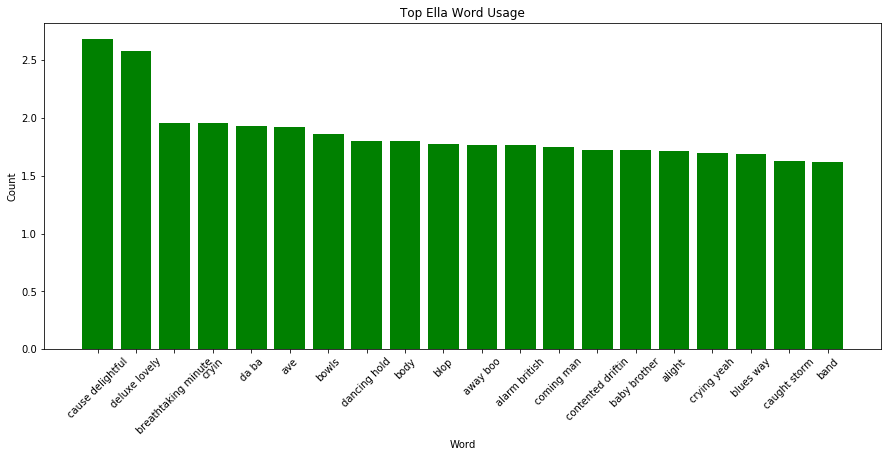

In [1870]:
plt.figure(figsize=(15,6))
plt.title('Top Ella Word Usage')
plt.ylabel('Count')
plt.xticks(rotation=45,size=10)
plt.xlabel('Word')
plt.bar(x = top_ella_words['words_ella'],height = top_ella_words['count'],color='green')
plt.show()

In [1866]:
top_cat_words = words_cat.sort_values('count',ascending=False).head(20)

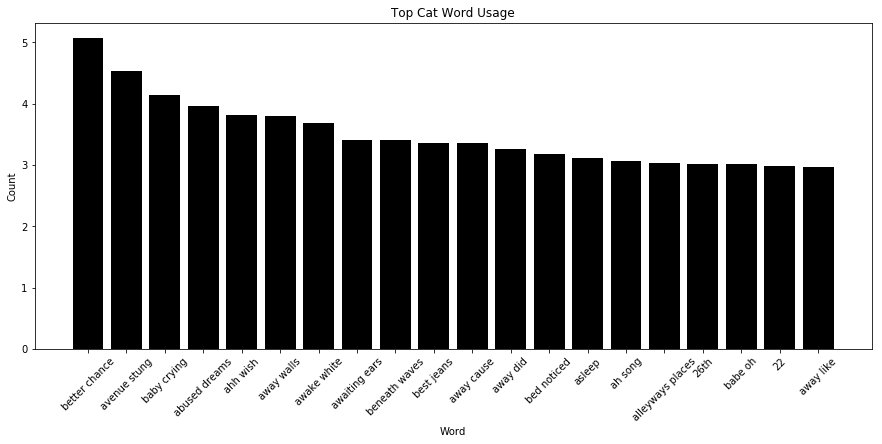

In [1871]:
plt.figure(figsize=(15,6))
plt.title('Top Cat Word Usage')
plt.ylabel('Count')
plt.xlabel('Word')
plt.xticks(rotation=45,size=10)
plt.bar(x = top_cat_words['word_cat'],height = top_cat_words['count'],color= 'black')
plt.show()

# Pretty Wordclouds

In [768]:
from PIL import Image, ImageDraw, ImageFont
from wordcloud import WordCloud, STOPWORDS 

In [2638]:
pwd

'/Users/glynismattheisen/Desktop/Spiced'

In [2646]:
mask1 = np.array(Image.open('my_image.png'))

In [2641]:
long_ella_list = ''.join(list_ella)
long_ella_list=long_ella_list.lower()
long_ella_list = re.sub("\.|\,|\?|\r|\n|<br>|<i>|</i>|<div>|<\div>|\-", " ", long_ella_list)

In [2642]:
long_cat_list = ''.join(list_cat)
long_cat_list=long_cat_list.lower()
long_cat_list = re.sub("\.|\,|\?|\r|\n|<br>|<i>|</i>|<div>|<\div>|\-", " ", long_cat_list)

In [2643]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(1800, 200%%, %d%%)" % random.randint(60, 100)

In [2647]:
def generate_wordcloud(text): 
    wordcloud = WordCloud(background_color='grey', mask= mask1, max_words=100, relative_scaling = 1.0).generate(text)
    plt.figure(figsize=(15,6))
    plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3))
    plt.axis("off")
    plt.show()

Ella


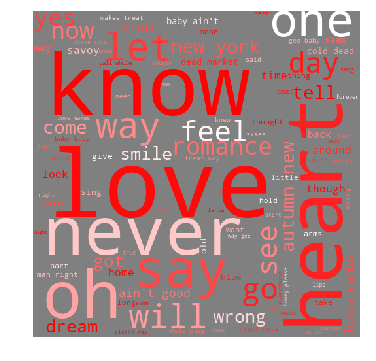

Cat


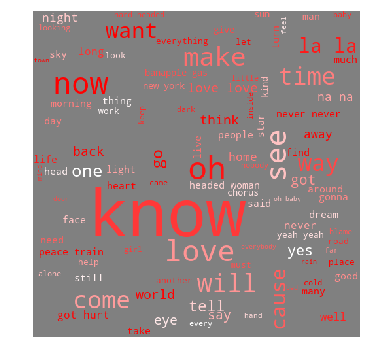

In [2648]:
print('Ella')
generate_wordcloud(long_ella_list)
print('Cat')
generate_wordcloud(long_cat_list)

# Model

In [1885]:
cat_frame = pd.DataFrame(list_cat, columns = ['song'])
cat_frame['artist'] = 'Cat Stevens'

In [1886]:
cat_frame.head(5)

,song,artist
0,Now maybe you're right and maybe you're wrong ...,Cat Stevens
1,Now that I've lost everything to you\r\nYou sa...,Cat Stevens
2,Time rise \r\nTime fall \r\nTime leaves you no...,Cat Stevens
3,"Well I think it's fine, building jumbo planes....",Cat Stevens
4,There's a yellow flower by your bed\r\nSadly d...,Cat Stevens


In [1887]:
ella_frame = pd.DataFrame(list_ella, columns =['song'])
ella_frame['artist'] = 'Ella Fitzgerald'

In [1888]:
# combine ella song df with cat song df and label artist in new column
frame = pd.concat([cat_frame,ella_frame])

In [1914]:
frame

,song,artist
0,Now maybe you're right and maybe you're wrong ...,Cat Stevens
1,Now that I've lost everything to you\r\nYou sa...,Cat Stevens
2,Time rise \r\nTime fall \r\nTime leaves you no...,Cat Stevens
3,"Well I think it's fine, building jumbo planes....",Cat Stevens
4,There's a yellow flower by your bed\r\nSadly d...,Cat Stevens
5,"[Chorus]\r\nI see a road, and I want to go hom...",Cat Stevens
6,"Baby, I've never had a single thing in my life...",Cat Stevens
7,"I was cold and so alone, but I couldn't help b...",Cat Stevens
8,Getting hung up all day on smiles\r\nWalking d...,Cat Stevens
9,When I speak to the flowers in my backyard\r\n...,Cat Stevens


In [2159]:
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range=(1,2),min_df = 0.02,max_df = 0.1)),
    ('tfidf', TfidfTransformer())
])

In [2160]:
x = frame['song']

In [2161]:
y = frame['artist']

In [2162]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 42)

In [2163]:
X_train_fit = pipeline.fit_transform(X_train)

In [2164]:
# fit train data
m = MultinomialNB()
m.fit(X_train_fit,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [2165]:
X_test = pipeline.transform(X_test)

In [2166]:
prediction = m.predict(X_test)

In [2167]:
accuracy = round((m.score(X_test,y_test)*100),2)

In [2168]:
print('Accuracy for Naive Bayes model: ' +str(accuracy) + '%')

Accuracy for Naive Bayes model: 88.73%


In [2169]:
prediction = pd.DataFrame(prediction, columns = ['artist'])

In [2170]:
artist = {"Cat Stevens": 1, "Ella Fitzgerald":0}
for data in prediction:
    prediction['artist'] = prediction['artist'].map(artist)

In [2171]:
y_test = pd.DataFrame(y_test)

In [2172]:
for data in y_test:
    y_test['artist'] = y_test['artist'].map(artist)

In [2173]:
from sklearn.metrics import recall_score
recall = round((recall_score(y_test, prediction))*100, 2)
recall

100.0

In [2175]:
print("Cross Validation Scores: " + str(cross_val_score(estimator = m, cv = 5, X = X_train_fit, y= y_train)))

Cross Validation Scores: [0.77272727 0.76744186 0.80952381 0.76190476 0.83333333]


In [2609]:
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

TypeError: 'numpy.ndarray' object is not callable

In [2177]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[1][0]
FP = confusion_matrix[0][1]

In [2178]:
print("True Negatives: " + str(TN),
     "-- True Positives: " + str(TP), "-- False Negatives: " + str(FN), "-- False Positives: " + str(FP))

True Negatives: 15 -- True Positives: 48 -- False Negatives: 0 -- False Positives: 8


In [2614]:
precision = round(((TP/(TP+FP))*100),2)

In [2174]:
 results = pd.DataFrame({
    'Variable': ['Accuracy','Precision','Recall'],
    'Score': [accuracy,precision,recall]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Variable
Score,
100.00,Recall
88.73,Accuracy
85.71,Precision


# PROB Diff

In [2594]:
# array 1 v array 2 words that tip balance in direction of one artist v another
probdiff = m.feature_log_prob_[0] - m.feature_log_prob_[1]

In [2595]:
probdiff

array([ 6.50841608e-01, -8.06483068e-02,  9.01618040e-01, -2.25632547e-02,
        3.32682368e-01, -1.00777452e+00, -6.21547908e-01, -7.91659461e-01,
       -7.25380935e-01, -6.10271948e-01,  3.77114778e-01,  8.17788973e-01,
       -5.54793810e-01,  7.78357608e-01,  3.72847377e-01, -1.56778473e-01,
       -1.24527846e+00,  4.97109141e-01,  1.90256622e-01,  3.91071109e-01,
       -7.26631822e-01,  3.91168657e-01, -2.88834215e-01,  5.06086116e-01,
        4.69050112e-01, -7.23982145e-01, -7.07293558e-01, -1.14938439e+00,
        3.11625081e-01,  3.43140435e-01,  2.36455848e-01, -6.21023753e-01,
       -4.54900189e-01,  4.58452722e-01, -7.17293490e-01,  3.36401972e-01,
       -3.61073263e-01,  4.36188933e-01, -4.59363767e-01,  4.31730761e-01,
       -4.35768543e-01,  5.95636033e-01, -2.58853267e-01, -3.61809660e-01,
        3.09299859e-01, -4.86589594e-01, -3.59300285e-01,  1.85865416e-01,
        3.77488557e-01, -4.49294152e-01,  7.22433901e-01,  4.20764913e-01,
        9.27717872e-01, -

In [2596]:
vect = CountVectorizer(stop_words = stop_words, ngram_range=(1,2),min_df = 0.02,max_df = 0.1)

In [2597]:
vect.fit_transform(X_train)

<213x387 sparse matrix of type '<class 'numpy.int64'>'
	with 3472 stored elements in Compressed Sparse Row format>

In [2598]:
words = vect.vocabulary_.keys()

In [2599]:
words = []
for key in vect.vocabulary_.keys():
    words.append(key)

In [2600]:
words.sort()

In [2601]:
words = words

In [2602]:
s = pd.Series(probdiff,index = words)

In [2603]:
s.sort_values(inplace=True)

In [2607]:
# most Ella
s.head(10)

romance    -1.416150
dear       -1.361786
skies      -1.308874
believe    -1.245278
blues      -1.149384
thrill     -1.095289
melody     -1.049601
memories   -1.045238
divine     -1.010146
lips       -1.008071
dtype: float64

In [2608]:
# most cat
s.tail(10)

dark         0.884097
ah           0.901618
work         0.907855
love love    0.913063
children     0.927718
god          0.945253
looking      0.968579
everybody    1.043721
going        1.108872
road         1.213094
dtype: float64

# Scatter Text

In [2592]:
import scattertext as st
import spacy

In [2589]:
head = frame.head(100)

In [2590]:
tail = frame.tail(100)

In [2591]:
body = head.append(tail)

In [2593]:
#Data frame to graph
body.head(5)

,song,artist
0,Now maybe you're right and maybe you're wrong ...,Cat Stevens
1,Now that I've lost everything to you\r\nYou sa...,Cat Stevens
2,Time rise \r\nTime fall \r\nTime leaves you no...,Cat Stevens
3,"Well I think it's fine, building jumbo planes....",Cat Stevens
4,There's a yellow flower by your bed\r\nSadly d...,Cat Stevens


In [2575]:
# Turn it into a Scattertext Corpus 
nlp = spacy.load('en') # set nlp
corpus = st.CorpusFromPandas(body, category_col='artist', text_col='song',nlp=nlp).build() # process and build corpus

In [2576]:
# words that differentiate corpus frol general English corpus
print(corpus.get_scaled_f_scores_vs_background().index[:50])

Index(['banapple', 'bitterblue', 'wubba', 'varthy', 'hipideedleada',
       'baaaaaaaaaaimp', 'moonshadow', 'whozis', 'tomahto', 'potahto',
       'moonray', 'gon', 'flam', 'dupa', 'learnin', 'outa', 'jakon', 'majiks',
       'swearin', 'fryin', 'palming', 'romping', 'driftin', 'drywood',
       'larfter', 'izitso', 'yessum', 'windin', 'lookahere', 'vanella',
       'arfter', 'wherezis', 'treaders', 'pyajahmas', 'gleamin', 'thrilly',
       'pyjahmas', 'lilywhite', 'nighting', 'sasparilla', 'whatzis',
       'tithesis', 'ersters', 'cashmeres', 'cryin', 'dyin', 'ridin', 'pitter',
       'darktown', 'strutters'],
      dtype='object')


In [2577]:
# build dataframe from term frequency
term_freq_df = corpus.get_term_freq_df()

In [2578]:
# scale 0-1 based on frequency
term_freq_df['Cat Score'] = corpus.get_scaled_f_scores('Cat Stevens')
term_freq_df['Ella Score'] = corpus.get_scaled_f_scores('Ella Fitzgerald')

In [2584]:
term_freq_df.head(5)

,Cat Stevens freq,Ella Fitzgerald freq,Cat Score,Ella Score
term,,,,
now,84,28,0.970264,0.029736
maybe,14,6,0.773856,0.226144
you,690,926,0.120917,0.879083
're,96,206,0.075984,0.924016
right,17,45,0.064139,0.935861


In [2580]:
# Most characteristic Cat Stevens words
print('Cat Words:')
print(term_freq_df.sort_values(by='Cat Score', ascending=False).index[:10])

Cat Words:
Index(['want to', 'yeah', 'want', 'coming', 'going', 'i love', 'ready', 'na',
       'bad', 'live'],
      dtype='object', name='term')


In [2581]:
# Most characteristic Ella Fitzgerald words
print('Ella Words:')
print(term_freq_df.sort_values(by='Ella Score', ascending=False).index[:10])

Ella Words:
Index([''re the', 'blues', 'new', 'when you', 'the blues', 'the way',
       'romance', 'dance', 'my heart', 'you 're'],
      dtype='object', name='term')


In [2586]:
# Produce HTML ScatterText Plot
html = st.produce_scattertext_explorer(corpus,category='Cat Stevens', category_name='Cat Stevens', not_category_name='Ella Fitzgerald', width_in_pixels=1000)
open("Artist.html", 'wb').write(html.encode('utf-8'))

682940

# LDA

In [2126]:
from sklearn.decomposition import LatentDirichletAllocation

In [2132]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.1, min_df=0.02, stop_words='english')
tf = tf_vectorizer.fit_transform(list_cat)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 5

In [2133]:
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [2134]:
def display_topics(model, feature_names, no_top_words):
   for topic_idx, topic in enumerate(model.components_):
       print("Topic %d:" % (topic_idx) )
       print(" ".join([feature_names[i]
                       for i in topic.argsort()[:-no_top_words - 1:-1]]) )

In [2135]:
##Display results
no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
awful money town ain wish talk paid chorus children city
Topic 1:
son bed work new train break years money run cares
Topic 2:
woman headed bad looking everybody kinds child coming said wild
Topic 3:
ready yeah dog maybe loving did ain wrong getting knows
Topic 4:
hurt wind kind didn door looking till change leave left
Topic 5:
reach school yeah moment knows end chorus soul friend today
Topic 6:
la great lady laugh coming star yeah bit low house
Topic 7:
morning remember late wish days gotta tomorrow play yeah try
Topic 8:
peace train thing lose new young words change happy ah
Topic 9:
gas blame gun ah inside boy try hope kind times
